In [0]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [0]:
class AdalineGD(object):
  """ADAptive LInear NEuron classifier.

  Parameters
  ------------
  eta : float
  Learning rate (between 0.0 and 1.0)
  n_iter : int
  Passes over the training dataset.
  random_state : int
  Random number generator seed for random weight initialization.
  
  Attributes
  -----------
  w_ : 1d-array
  Weights after fitting.
  cost_ : list
  Sum-of-squares cost function value in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data.

    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
    Training vectors, where n_examples
    is the number of examples and
    n_features is the number of features.
    y : array-like, shape = [n_examples]
    Target values.
    
    Returns
    -------
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
      
  def activation(self, X):
    """Compute linear activation"""
    return X
      
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 
                    1, -1)

In [199]:
# We are interested in how variables, such as GRE (Graduate Record Exam scores), 
# GPA (grade point average) and prestige of the undergraduate institution, 
# affect admission into graduate school. 
#
# The response variable, admit/don’t admit, is a binary variable.
# There are three predictor variables: gre, gpa and rank. 
# We will treat the variables gre and gpa as continuous. 
# The variable rank takes on the values 1 through 4. Institutions with a rank 
# of 1 have the highest prestige, while those with a rank of 4 have the lowest.
#data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   header=None, 
                   encoding='utf-8')
print(data)

data.describe()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


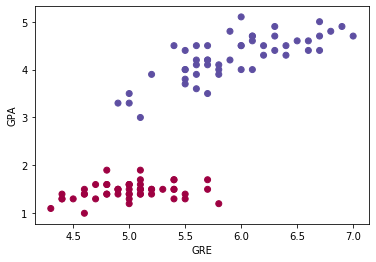

In [200]:
# "admit" is the column with the label (0 or 1).
#y=data.iloc[:,0].values
y=data.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#print(y)

# The rest of the columns are the features.
#X = data.iloc[:,1:4].values
X = data.iloc[0:100,[0,2]].values
#print(X)

# Visualize the training examples. Since we have 3 features, we actually 
# project onto two features in each plot (GRE vs GPA, and then GRE vs rank).
#xcoords, ycoords, zcoords = zip(*X)
xcoords, ycoords = zip(*X)

#plt.subplot(1, 2, 1)
plt.scatter(xcoords, ycoords, c=y, cmap="Spectral")
plt.xlabel('GRE')
plt.ylabel('GPA')

#plt.subplot(1, 2, 2)
#plt.scatter(xcoords, zcoords, c=y, cmap="Spectral")
#plt.xlabel('GRE')
#plt.ylabel('rank')
plt.show()


The preceding scatterplot shows the distribution of admissions (blue = admit / red = not admit) in the 
dataset along the two feature axes: GRE and GPA (or GRE and university rank). In this two-dimensional feature subspace, we can see that a linear decision boundary is NOT sufficient to separate admission from non-admission.
Thus, a linear classifier such as logistic regression should not be able to classify the examples in this dataset perfectly.

In [0]:
# We use the scikit-learn function 
#   train_test_split(X, y, test_size=0.33, random_state=42) to split the data 
# into training and test data sets, given 33% of the records to the test 
# data set. The training data set is used to train the mode, meaning find 
# the weights and biases. The test data set is used to check its accuracy.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# We decide to not normalize the data values.



Now, it's time to train our logistic regression algorithm on the data subset that we
just extracted. Also, we will plot the misclassification error for each epoch to check
whether the algorithm converged and found a decision boundary that separates the
two classes

10
[ 0.00523016 -0.0229981   0.09409078]
[51.08122709777622, 48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111]


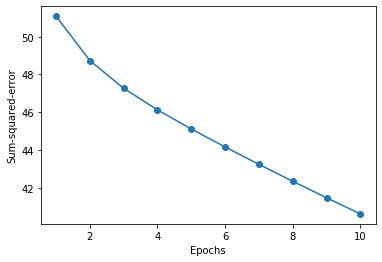

In [201]:
#ada = AdalineGD(n_iter=10, eta=0.01).fit(X_train, y_train)
ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

print(ada.n_iter)
print(ada.w_)
print(ada.cost_)

# Let's now plot the cost against the number of epochs
plt.plot(range(1, len(ada.cost_) + 1),
         ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()